# Importing the required Libraries

In [24]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [41]:
import pandas as pd
from matplotlib import pyplot as plt
import collections
import warnings
import pandas_profiling
import numpy as np
import seaborn as sns
import sklearn
from sklearn import metrics
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
%matplotlib inline
import graphviz


In [28]:
import graphviz

# Reading the CSV file from the machine

In [14]:
df = pd.read_csv("D:\Module3_RP\Session2\Churn.csv", sep = ',')

# Dummy Coding

Assigning numerical codes to the categorical data; below code looks for the column with OBJECT datatype, and assign the codes

In [15]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.Categorical(df[col]).codes

# Exploratory Data Analysis of the given data:

In [30]:
df.describe()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,...,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,3257.794122,0.265370
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,...,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,1888.693496,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,1609.000000,0.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,3249.000000,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,4901.500000,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,6530.000000,1.000000


In [31]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1


In [17]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null int16
gender              7043 non-null int8
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int8
Dependents          7043 non-null int8
tenure              7043 non-null int64
PhoneService        7043 non-null int8
MultipleLines       7043 non-null int8
InternetService     7043 non-null int8
OnlineSecurity      7043 non-null int8
OnlineBackup        7043 non-null int8
DeviceProtection    7043 non-null int8
TechSupport         7043 non-null int8
StreamingTV         7043 non-null int8
StreamingMovies     7043 non-null int8
Contract            7043 non-null int8
PaperlessBilling    7043 non-null int8
PaymentMethod       7043 non-null int8
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null int16
Churn               7043 non-null int8
dtypes: float64(1), int16(2), int64(2), int8(16)
memory usage: 302.

# Creating Features and Labels

Lables/Dependent Variable: CHURN

Features/Independent Variables: All Columns other than CHURN

In [18]:
x = df.drop('Churn', axis = 1)

In [19]:
x = x.drop(['customerID'],1)

In [20]:
y = df['Churn']

# Split Train and Test Data

Train Data=75% Test Data=25%

In [21]:

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.25,random_state=1)

In [25]:
train_x.shape
train_y.shape
test_x.shape
test_y.shape

(5282, 19)

(5282,)

(1761, 19)

(1761,)

# Instatiate the model

Decision Tree are used when we need some output based on same property inputs with varying values. Here we are deciding whether the customer is a Churner or not loooking at the different behaviour/features for every customer.


Following are some of the advantages of using Decision tree:

* Decision trees implicitly perform variable screening or feature selection.
* Decision trees require relatively little effort from users for data preparation.
* Nonlinear relationships between parameters do not affect tree performance.
* The best feature of using trees for analytics - easy to interpret and explain to executives.

# Fitting the Decision Tree Model on your Features and Labels

In [35]:
clf = tree.DecisionTreeClassifier(criterion="gini",max_depth=2)
clf = clf.fit(train_x, train_y)

# Predicting on Test Data

In [43]:
predicted=clf.predict(test_x)

# Model Performance Evaluation

In [44]:
metrics.accuracy_score(predicted,test_y)

0.7569562748438388

The model is 75.05% accurate in predicting the Churners and Non-Churners when compared with the actual data

In [45]:
print(metrics.classification_report(predicted,test_y))

              precision    recall  f1-score   support

           0       0.76      0.90      0.82      1115
           1       0.75      0.50      0.60       646

   micro avg       0.76      0.76      0.76      1761
   macro avg       0.76      0.70      0.71      1761
weighted avg       0.76      0.76      0.74      1761



The model has recalled/predicted 50% of Churners correctly, among the 646 actual Churners

The model has recalled/predicted 90% of Non-Churners correctly, among the 1115 actual Non-Churners

The model is 75% precise in predicting the Churners correclty among all its predicted churners

The model is 76% precise in predicting the Non-Churners correclty among all its predicted Non-Churners

Confusion Matrix


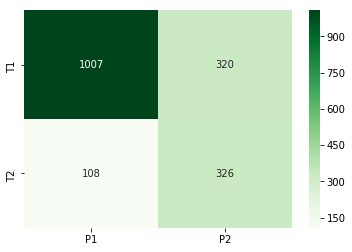

In [63]:
#Confusion matrix
print('Confusion Matrix')
cf=metrics.confusion_matrix(test_y,predicted)
lbl1=["P1","P2"]
lbl2=["T1","T2"]
sns.heatmap(cf,annot=True,cmap="Greens",fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show();

# True Positive= 326

The model has predicted 326 as Churners and they are actually Churners according the real dataset.

# True Negative=1007

The model has predicted 1174 as Non-Churners and they are actually Non-Churners according the real dataset.

# False Positive=320

The model has predicted 320 as Churners but they are actually Non-Churners according the real dataset.

# False Negative=191

The model has predicted 191 as Non-Churners but they are actually Churners according to real dataset

# Feature Importance

In [48]:
clf.feature_importances_,x.columns
features=pd.DataFrame(clf.feature_importances_,x.columns)
features
features.columns=["Importance"]
features

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.19878792, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.7714332 ,
        0.        , 0.        , 0.02977888, 0.        ]),
 Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
        'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
        'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
        'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
        'MonthlyCharges', 'TotalCharges'],
       dtype='object'))

,0
gender,0.000000
SeniorCitizen,0.000000
Partner,0.000000
Dependents,0.000000
tenure,0.000000
PhoneService,0.000000
MultipleLines,0.000000
InternetService,0.000000
OnlineSecurity,0.198788
OnlineBackup,0.000000


,Importance
gender,0.000000
SeniorCitizen,0.000000
Partner,0.000000
Dependents,0.000000
tenure,0.000000
PhoneService,0.000000
MultipleLines,0.000000
InternetService,0.000000
OnlineSecurity,0.198788
OnlineBackup,0.000000


From the above table, we can infer that CONTRACT,ONLINE SECURITY AND MONTHLY CHARGES are the significant Features in deciding if the customer is a Churner or not. And hence we should be seeing CONTRACT as the root node for the decision tree we expecting  create.

In [36]:
churnTree = tree.export_graphviz(clf, out_file=None, 
                         feature_names = list(train_x.columns.values),  
                         class_names = ['No churn', 'Churn'],
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(churnTree)
graph.render('decision_tree.gv', view=True)

'decision_tree.gv.pdf'

# Decision Tree Visualization

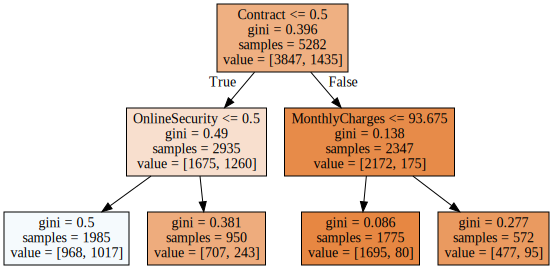

In [64]:
# Visualize the decision tree graph
# conda install -c anaconda graphviz
# conda install -c conda-forge python-graphviz
import graphviz
with open('tree.dot','w') as dotfile:
    tree.export_graphviz(clf, out_file=dotfile, feature_names=list(train_x.columns.values), filled=True)
    dotfile.close()
    
from graphviz import Source

with open('tree.dot', 'r') as f:
    text=f.read()
    plot=Source(text)
plot

Here the better category of Customers with samples 950 and 1175, since their gini is 0.381 and 0.086, which are the least ginis.

# Decision Tree Hyperparameters Optimization using Cross-Validation and gridsearch

In [49]:
criterion=['gini','entropy']
min_samples=[2,10,20,50,100]
max_depth=[20,30,40,50,None]

In [51]:
param_grid={'criterion':criterion, 'min_samples_split': min_samples,'max_depth':max_depth}
dt_g=GridSearchCV(clf,param_grid,cv=5,verbose=2,n_jobs=-1)
dt_g.fit(train_x,train_y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    8.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'min_samples_split': [2, 10, 20, 50, 100], 'max_depth': [20, 30, 40, 50, None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [52]:
dt_g.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [53]:
dt_g.best_score_

0.7815221507004922

In [54]:
dt_g.best_index_

29

Among all the 250 fits, the best fit the model is prescibing is the 29th one which has the average accuracy of the 78.152%

After the cross validation , the considering the model, evaluating the metrics for the same.

In [67]:
predicted1=dt_g.predict(test_x)
print(metrics.accuracy_score(predicted1,test_y))
print(metrics.classification_report(predicted1,test_y))


0.8006814310051107
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1416
           1       0.49      0.62      0.55       345

   micro avg       0.80      0.80      0.80      1761
   macro avg       0.70      0.73      0.71      1761
weighted avg       0.82      0.80      0.81      1761



The model is 80.0681% accurate in predicting the Churners and Non-Churners when compared with the actual data

The model has recalled/predicted 62% of Churners correctly, among the 345 actual Churners

The model has recalled/predicted 84% of Non-Churners correctly, among the 1416 actual Non-Churners

The model is 49% precise in predicting the Churners correclty among all its predicted churners

The model is 90% precise in predicting the Non-Churners correclty among all its predicted Non-Churners

Confusion Matrix


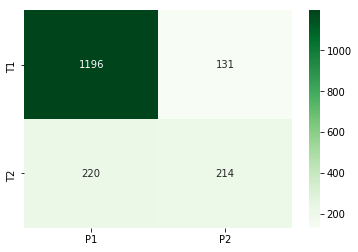

In [66]:
print('Confusion Matrix')
cf=metrics.confusion_matrix(test_y,predicted1)
lbl1=["P1","P2"]
lbl2=["T1","T2"]
sns.heatmap(cf,annot=True,cmap="Greens",fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show();

# True Positive= 214

The model has predicted 214 as Churners and they are actually Churners according the real dataset.

# True Negative=1196

The model has predicted 1196 as Non-Churners and they are actually Non-Churners according the real dataset.

# False Positive=131

The model has predicted 131 as Churners but they are actually Non-Churners according the real dataset.

# False Negative=220

The model has predicted 220 as Non-Churners but they are actually Churners according to real dataset

# To downloan the Cross Validation results to CSV file

In [60]:
cv=pd.DataFrame(dt_g.cv_results_)

In [61]:
cv.to_csv("D:\Module3_RP\Session1\Churners_CVResults.csv")